# Import necessary libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import matplotlib.pyplot as plt



In [2]:
traindir='/kaggle/input/div2k-dataset/div2k_train_hr/DIV2K_train_HR/'
validdir='/kaggle/input/div2k-dataset/div2k_valid_hr/DIV2K_valid_HR/'

# Check sample sizes and size of each image

In [3]:
print("Training sample size:",len(os.listdir(traindir)))
print("Validation sample size:",len(os.listdir(validdir)))


Training sample size: 800
Validation sample size: 100


In [4]:
image_sizes_train=[cv2.imread(traindir+i).shape for i in os.listdir(traindir)]
image_sizes_valid=[ cv2.imread(validdir+i).shape for i in os.listdir(validdir)]


In [5]:
image_sizes_train= set(image_sizes_train)
image_sizes_valid= set(image_sizes_valid)


In [6]:
print("Different sizes of hr training images:",len(image_sizes_train))
print("Different sizes of hr validation images:",len(image_sizes_valid))

Different sizes of hr training images: 94
Different sizes of hr validation images: 24


In [7]:
image_sizes_train

{(648, 2040, 3),
 (732, 2040, 3),
 (744, 2040, 3),
 (768, 2040, 3),
 (780, 2040, 3),
 (852, 2040, 3),
 (864, 2040, 3),
 (888, 2040, 3),
 (936, 2040, 3),
 (948, 2040, 3),
 (960, 2040, 3),
 (972, 2040, 3),
 (1044, 2040, 3),
 (1068, 2040, 3),
 (1080, 2040, 3),
 (1092, 2040, 3),
 (1128, 2040, 3),
 (1140, 2040, 3),
 (1152, 2040, 3),
 (1164, 2040, 3),
 (1176, 2040, 3),
 (1188, 2040, 3),
 (1200, 2040, 3),
 (1212, 2040, 3),
 (1224, 2040, 3),
 (1248, 2040, 3),
 (1260, 2040, 3),
 (1272, 2040, 3),
 (1284, 2040, 3),
 (1296, 2040, 3),
 (1308, 2040, 3),
 (1320, 2040, 3),
 (1332, 2040, 3),
 (1344, 2040, 3),
 (1356, 2040, 3),
 (1368, 2040, 3),
 (1380, 2040, 3),
 (1392, 2040, 3),
 (1404, 2040, 3),
 (1416, 2040, 3),
 (1428, 2040, 3),
 (1440, 2040, 3),
 (1452, 2040, 3),
 (1464, 2040, 3),
 (1476, 2040, 3),
 (1488, 2040, 3),
 (1512, 2040, 3),
 (1524, 2040, 3),
 (1536, 2040, 3),
 (1548, 2040, 3),
 (1560, 2040, 3),
 (1572, 2040, 3),
 (1584, 2040, 3),
 (1608, 2040, 3),
 (1632, 2040, 3),
 (1644, 2040, 3),
 (16

# Making all images square shaped with black padding, and decreasing their size to (510,510) for easier operability

In [8]:
def resize_and_pad(image, target_size):
    h, w = image.shape[:2]
    max_dim = max(h, w)
    delta_w = max_dim - w
    delta_h = max_dim - h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    color = [0, 0, 0]
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    resized_image = cv2.resize(new_image, target_size,interpolation=cv2.INTER_AREA)
    return resized_image

image_paths = [traindir+i for i in os.listdir(traindir)]
resized_images = []
target_size = (510, 510)

for image_path in image_paths:
    image = cv2.imread(image_path)
    resized_image = resize_and_pad(image, target_size)
    resized_images.append(resized_image)


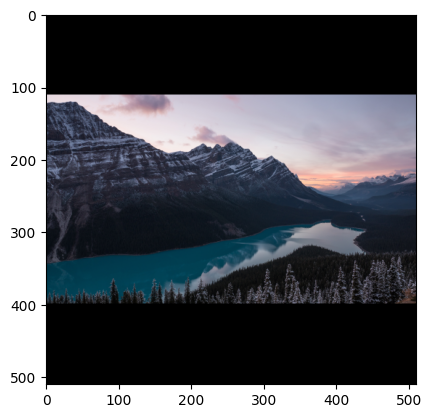

In [9]:
plt.imshow(resized_images[700][...,::-1])

In [10]:
plt.imsave("High quality.jpg",resized_images[700][...,::-1])

# Create low quality images by adding blur, noise and depixelation

In [11]:
def add_realistic_effects(image):
    mean = 0
    sigma = np.random.uniform(0.1, 0.5)  # Random sigma value between 0.1 and 0.5
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    kernel_size = np.random.choice([3, 5, 7])  # Randomly select kernel size
    blurred_image = cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), 0)
    depixelated_image = cv2.resize(blurred_image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

    return cv2.resize(blurred_image, (170,170), interpolation=cv2.INTER_NEAREST)

In [12]:
resized_images[600].shape

(510, 510, 3)

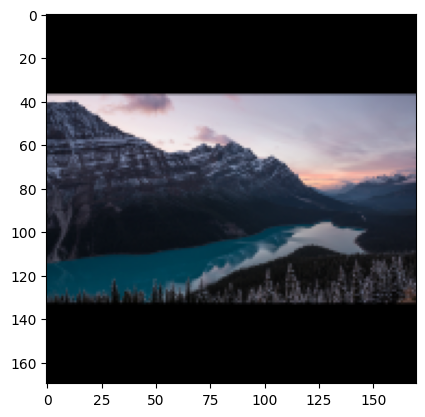

In [13]:
low_quality=add_realistic_effects(resized_images[700])
plt.imshow(low_quality[...,::-1])

In [14]:
plt.imsave("Low quality.jpg",low_quality[...,::-1])

# Creating dataset by placing images in respective folders

In [15]:
os.mkdir("Training")
os.mkdir("Training/HR")
os.mkdir("Training/HR/hr_images")
os.mkdir("Training/LR")
os.mkdir("Training/LR/lr_images")

os.mkdir("Validation")
os.mkdir("Validation/HR")
os.mkdir("Validation/HR/hr_images")
os.mkdir("Validation/LR")
os.mkdir("Validation/LR/lr_images")

In [16]:
training_image_paths = [traindir+i for i in os.listdir(traindir)]
hr_training_images = []
lr_training_images=[]
for image_path in training_image_paths:
    image = cv2.imread(image_path)
    resized_image = resize_and_pad(image, target_size)
    hr_training_images.append(resized_image[...,::-1])
    lr_training_images.append(add_realistic_effects(resized_image)[...,::-1])
    

In [17]:
validation_image_paths = [validdir+i for i in os.listdir(validdir)]
hr_valid_images = []
lr_valid_images=[]
for image_path in validation_image_paths:
    image = cv2.imread(image_path)
    resized_image = resize_and_pad(image, target_size)
    hr_valid_images.append(resized_image[...,::-1])
    lr_valid_images.append(add_realistic_effects(resized_image)[...,::-1])

In [18]:
hr_train_save_dir="/kaggle/working/Training/HR/hr_images/"
lr_train_save_dir="/kaggle/working/Training/LR/lr_images/"
for i in range(800):
    plt.imsave(hr_train_save_dir+str(i)+".jpg",hr_training_images[i])
    plt.imsave(lr_train_save_dir+str(i)+".jpg",lr_training_images[i])
    

In [19]:
hr_valid_save_dir="/kaggle/working/Validation/HR/hr_images/"
lr_valid_save_dir="/kaggle/working/Validation/LR/lr_images/"
for i in range(100):
    plt.imsave(hr_valid_save_dir+str(i)+".jpg",hr_valid_images[i])
    plt.imsave(lr_valid_save_dir+str(i)+".jpg",lr_valid_images[i])
    